In [2]:
# Doing PCA on diabetes dataset

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Datasets/diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
# Columns to retain

numerical_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [6]:
# Handle missing values for numerical columns

numerical_data = df[numerical_cols]
imputer_num = SimpleImputer(strategy = 'mean')
numerical_data = imputer_num.fit_transform(numerical_data)
numerical_df = pd.DataFrame(numerical_data, columns = numerical_cols)

In [7]:
# Standardize the data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_df)

In [37]:
# Apply PCA

pca = PCA(3)
X_pca = pca.fit_transform(data_scaled)

In [38]:
# Variance captured by each component

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

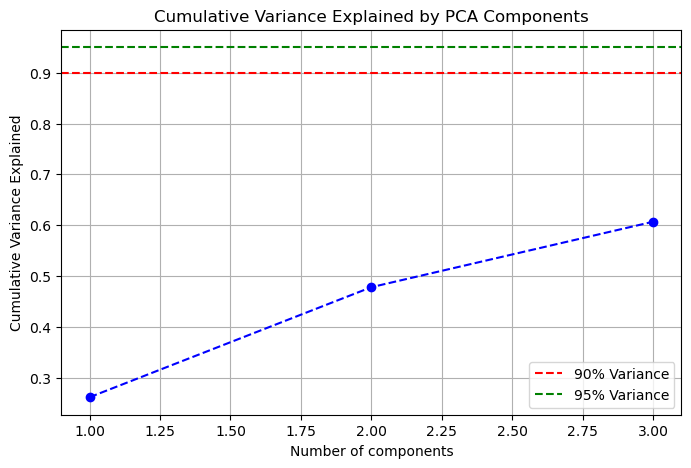

In [39]:
# Plot cumulative variance

plt.figure(figsize = (8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker = 'o', linestyle = '--', color = 'b')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y = 0.9, color = 'r', linestyle = '--', label = '90% Variance')
plt.axhline(y = 0.95, color = 'g', linestyle = '--', label = '95% Variance')
plt.legend()
plt.grid()
plt.show()

In [40]:
# Display results

print("Explained Variance Ratio (for each PC):")
print(explained_variance)

Explained Variance Ratio (for each PC):
[0.26179749 0.21640127 0.12870373]


In [41]:
print("\nCumulative Variance:")
print(cumulative_variance)


Cumulative Variance:
[0.26179749 0.47819876 0.60690249]


In [42]:
# Display loadings (contribution of original features to each principal component)
loadings = pd.DataFrame(
    pca.components_.T, # Transform to get features as rows
    columns = [f'PC{i+1}' for i in range(pca.n_components_)],
    index = numerical_cols
)

print("\nFeature Loadings for Each Principal Component:")
print(loadings.round(3)) # Rounded for better readability


Feature Loadings for Each Principal Component:
                            PC1    PC2    PC3
Pregnancies               0.128  0.594  0.013
Glucose                   0.393  0.174 -0.468
BloodPressure             0.360  0.184  0.535
SkinThickness             0.440 -0.332  0.238
Insulin                   0.435 -0.251 -0.337
BMI                       0.452 -0.101  0.362
DiabetesPedigreeFunction  0.271 -0.122 -0.433
Age                       0.198  0.621 -0.075
